In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

In [5]:
print(fish_data)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [6]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [7]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

기본적으로 25%를 테스트 세트로 떼어냄

In [10]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [11]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


빙어(0) 데이터가 모자람, 이런 경우 샘플링 편향이 생길 수 있음, stratify 매개변수 사용하여 비율 맞추기

In [12]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [13]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


k-최근접 이웃 훈련

In [14]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [15]:
print(kn.predict([[25, 150]]))

[0.]


산점도 그리기

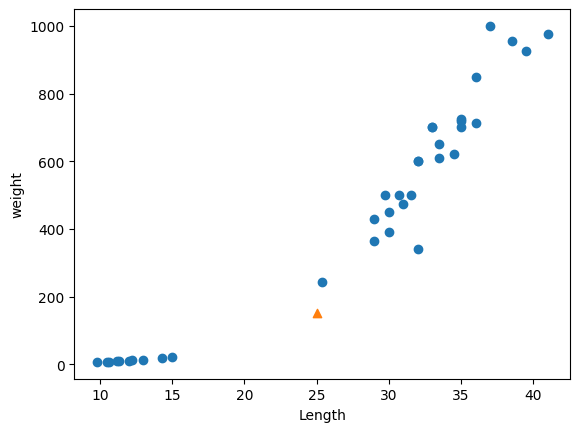

In [16]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')  # 입력 받은 데이터 세모로 표시
plt.xlabel('Length')
plt.ylabel('weight')
plt.show()

In [17]:
distances, indexes = kn.kneighbors([[25,150]])  # 근접한 인덱스와 거리 반

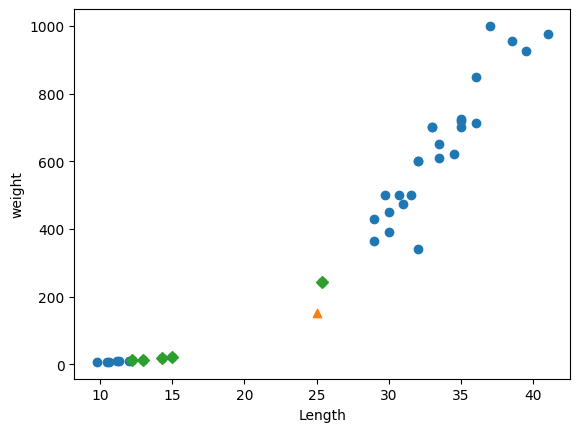

In [18]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('Length')
plt.ylabel('weight')
plt.show()

In [19]:
print(train_input[indexes])


[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [20]:
print(train_target[indexes])  # 빙어 데이터가 더 많이 들어간것을 확인 할 수 있음

[[1. 0. 0. 0. 0.]]


In [21]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


산점도에서는 거리가 가까워 보였지만 자세히 보면 x축과 y축에 거리 비율이 다름
범위를 맞추기위해 xlim, ylim 함수 사용

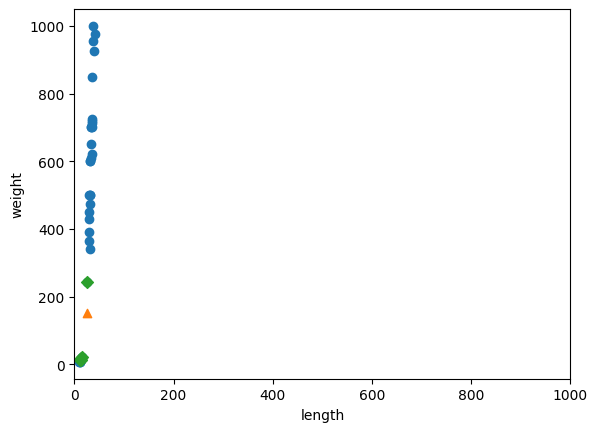

In [22]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

데이터를 표현하는 기준이 다르다면 알고리즘이 올바르게 예측할 수 없음

이런 경우 데이터 전처리가 필요, 가장 널리 사용하는 방법 중 하나는 표준점수
표준점수는 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타냄
이를 통해 실제 특성값의 크기와 상관없이 동일한 조건에서 비교할 수 있음

In [23]:
mean = np.mean(train_input, axis=0)  # 평균 계산
std = np.std(train_input, axis=0)  # 표준편차 계산
# aixs=0 으로 지정하여 행을 따라 각 열의 통계 값을 계산

In [24]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


표준점수 = (원본 데이터 - 평균) / 표준편차

In [25]:
train_scaled = (train_input - mean) / std

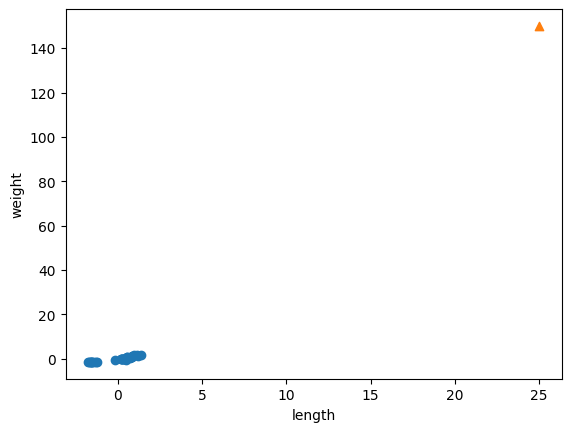

In [26]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

훈련 데이터들은 표준점수로 바꾸었지만 입력한 샘플데이터를 표준점수로 바꾸지 않았음

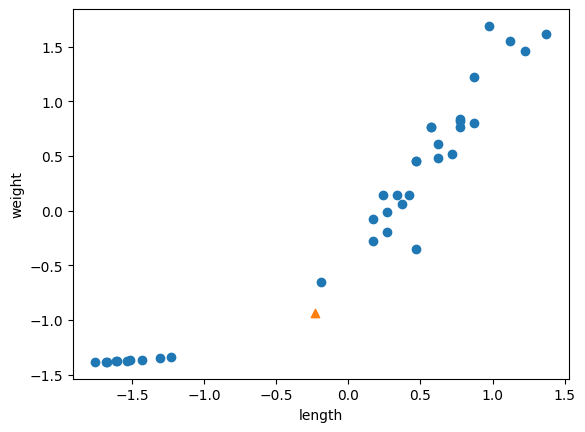

In [27]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [29]:
test_scaled = (test_input - mean) / std

In [30]:
kn.score(test_scaled, test_target)  # 전부 맞춤

1.0

In [31]:
print(kn.predict([new]))

[1.]


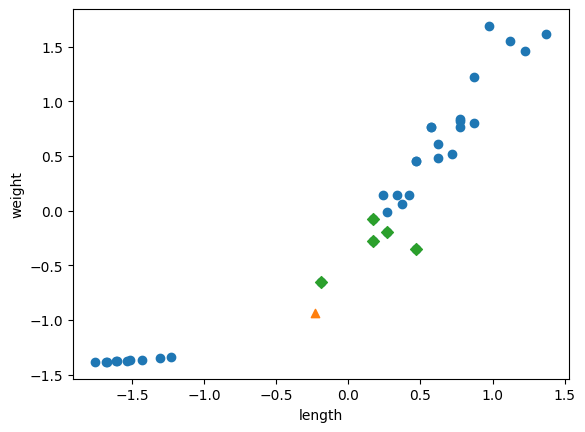

In [33]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes, 1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()